<a href="https://colab.research.google.com/github/luup-netizen/notion-cover/blob/main/lectures/module2/2-2_timeseries_timedomain/2-2b%20%E2%80%93%20Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we're going to talk about [`matplotlib`](https://matplotlib.org/) — a comprehensive library for creating static, animated, and interactive visualizations in Python. We will use this library throughout the course to visualize our datasets and the performance of the machine learning models we will eventually be building.

It should be noted that `pandas` has many built-in functions for generating plots directly from `DataFrames`, typically using `matplotlib` behind the scenes. While this can sometimes be more convenient than grabbing data yourself and then mantually writing `matplotlib` code to generate a figure, there are going to be many situations when you are going to want to plot data from `numpy` arrays or other data structures. Therefore, we're going to stick with `matplotlib` so that you have the tools you need to plot anything.

In [1]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Important: Run this code cell each time you start a new session!

In [2]:
!pip install numpy
!pip install pandas
!pip install os
import numpy as np
import pandas as pd
import os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
# Download some files of a sepsis dataset
sepsis_folder = "sepsis_dataset"
if not os.path.exists(sepsis_folder):
    os.mkdir(sepsis_folder)
patient_list = range(1, 11)
patient_list = [f'p{str(s).zfill(6)}.psv' for s in patient_list]
for f in patient_list:
  !wget -nc https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/{f}
  os.rename(f, os.path.join(sepsis_folder, f))

--2025-11-19 17:34:02--  https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/p000001.psv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9062 (8.8K) [text/plain]
Saving to: ‘p000001.psv’

p000001.psv         100%[===================>]   8.85K  --.-KB/s    in 0s      

2025-11-19 17:34:02 (136 MB/s) - ‘p000001.psv’ saved [9062/9062]

--2025-11-19 17:34:02--  https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/p000002.psv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3864 (3.8K) [text/plain]
Saving to: ‘p000002.psv’

p000002.psv         100%[===================>]   3.77K  --.-KB/s    in 0s      

2025-11-19 17:34:02 (1.00 GB/s) - ‘p000002.psv’ saved [3864/3864]

--2025-11-19 17

In [4]:
# Convert the sepsis dataset to a single csv
def load_single_file(file_path):
    df = pd.read_csv(file_path, sep="|")
    df['PatientID'] = file_path.split(os.sep)[-1][:-4]
    df['Hour'] = df.index
    keep_cols = ['PatientID', 'Age', 'Gender', 'SepsisLabel', 'Hour',
                 'HR', 'O2Sat', 'SBP', 'DBP', 'Resp']
    df = df[keep_cols]
    df.rename(columns={'Gender': 'Sex', 'SepsisLabel': 'HasSepsis'}, inplace=True)
    return df

def create_final_table(patient_list):
    final_df = pd.DataFrame()
    for f in patient_list:
        df = load_single_file(os.path.join(sepsis_folder, f))
        final_df = pd.concat([final_df, df])
    final_df.to_csv('sepsis.csv',index=False)
create_final_table(patient_list)

# Bar Chart

Let's revisit the [2019 PhysioNet Challenge](https://physionet.org/content/challenge-2019/1.0.0/) dataset we used in the last session, but this time we will look at data recorded across multiple hours.

In [5]:
df = pd.read_csv('sepsis.csv')
df

,PatientID,Age,Sex,HasSepsis,Hour,HR,O2Sat,SBP,DBP,Resp
0,p000001,83.14,0,0,0,NaN,NaN,NaN,NaN,NaN
1,p000001,83.14,0,0,1,97.0,95.0,98.0,NaN,19.0
2,p000001,83.14,0,0,2,89.0,99.0,122.0,NaN,22.0
3,p000001,83.14,0,0,3,90.0,95.0,NaN,NaN,30.0
4,p000001,83.14,0,0,4,103.0,88.5,122.0,NaN,24.5
...,...,...,...,...,...,...,...,...,...,...
580,p000010,76.71,0,0,18,82.0,96.0,109.0,50.0,20.0
581,p000010,76.71,0,0,19,79.0,94.0,97.0,49.0,21.0
582,p000010,76.71,0,0,20,79.0,90.0,117.0,54.0,19.0
583,p000010,76.71,0,0,21,84.0,91.0,124.0,59.0,23.0


Imagine that we wanted to figure out how many rows in the table are associated with each patient. One of the best ways of displaying this information is a ***bar chart***.

To make this graph, we will want to get two sets of data:
1. The independent variable, which is the ID of each patient
2. The dependent variable, which is the number of rows they have in the dataset

To get this data from a `Series`, we can use the handy `.value_counts()` method. The values in the output will be our dependent values, and the corresponding indices will be our independent values.

In [6]:
# Counts the number of times each unique patient name appears in the Series
num_samples = df['PatientID'].value_counts()
print(num_samples)

PatientID
p000009    258
p000001     54
p000005     48
p000003     48
p000007     45
p000008     40
p000004     29
p000002     23
p000010     23
p000006     17
Name: count, dtype: int64


We can plot this data using the `bar()` function in `matplotlib`. At minimum, we need to specify the independent variable and the dependent variable in that order. These arguments can be lists, `numpy` arrays, or `pandas` `Series`.

The two other commands we're using below are not strictly necessary, but we'll use them to make the graphs look more tidy in Jupyter.

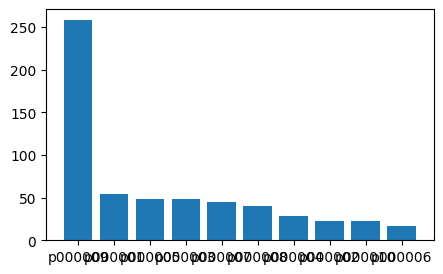

In [7]:
plt.figure(figsize=(5, 3)) # Generates a new 3"x5" figure
plt.bar(num_samples.index, num_samples) # x-axis is Patient ID, y-axis is the number of samples
plt.show() # Shows the figure without any extra text in the console

This is a good starting point, but there are a couple of issues with this graph:
1. It's hard to read the patient names along the x-axis.
2. If we were to send this image to someone, they won't know what this graph is showing unless we give them some additional background information.

It is good to get in the habit of making clearly labelled graphs where people know exactly what they are looking at.

Let's clean up this image a bit.

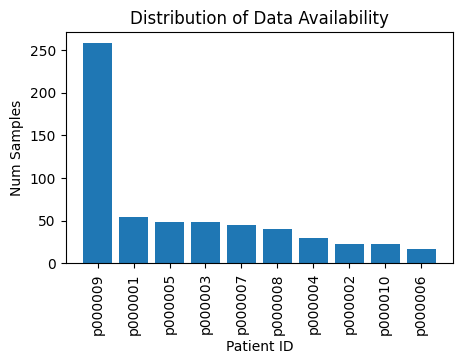

In [8]:
plt.figure(figsize=(5, 3)). ##can save as a veriable by being like fig1=, but more of a styalistic thing
plt.bar(num_samples.index, num_samples)
plt.xlabel('Patient ID') # Add a label to the x-axis
plt.ylabel('Num Samples') # Add a label to the y-axis
plt.title('Distribution of Data Availability') # Add a title
plt.xticks(rotation = 90) # We're rotating the tick marks so that they don't overlap
plt.show()

Notice that we created yet a new figure at the top of the previous code block. As we'll see later, this ensures that you are working with a blank canvas whenever you are creating a plot. Otherwise, you might generate two plots on the same figure instance.

# Box Plot

Now let's make this a bit more complicated. Rather than trying to plot a single number for each patient, let's look at the distribution of heart rates for each patient in our dataset. In other words, we want a ***box plot*** (i.e., a box-and-whiskers plot) showing the heart rate data of each patient.

To make this graph, we will want to get two sets of data:
1. The independent variable, which is the ID of each patient
2. The dependent variable, which is the corresponding list of heart rate measurements for each patient

`boxplot()` is different from most other graphing functions in `matplotlib` because it only takes in a single input: a list of lists that will be used to generate the distributions. Another important consideration about `boxplot()` is that it does not like it calculating distributions when there are `nan` values.

There are some advanced functions provided by `pandas` to help us get what we need, but we'll do it manually to save the time of going over them. The manual approach will involve the following steps: (4 loop kind of structure)
1. Initialize a data structure where we will accumulate our results.
2. Get all the patient IDs
3. For each patient ID, grab all of the corresponding rows in the `DataFrame`
4. Remove the heart rate values that are `nan`
5. Add the list of remaining heart rate values to our accumulator

In [10]:
# Create a place to store this data
patient_ids = df['PatientID'].unique()
list_of_heart_rate_lists = []
#a list of lists that will each have the heart rate value for a specific patient
# Iterate through unique PatientIDs
for patient_id in patient_ids:
    # Grab their heart rate data
    #grab all of their rows, then index insire our data prame, will gab all the rows in which it is true (row for specific patient)
    patient_df = df[df['PatientID'] == patient_id]
    patient_hrs = patient_df['HR'].values

    # Remove all the heart rates that are nan #becuase boxplot doesnt like nan values
    patient_hrs = patient_hrs[~np.isnan(patient_hrs)] #only keep the rows in which thevalue is a number/remve ones that are not a number
    list_of_heart_rate_lists.append(patient_hrs)

print(patient_ids) #patient IDs vaieable
print(list_of_heart_rate_lists) #list of numpy arrays for each patient

['p000001' 'p000002' 'p000003' 'p000004' 'p000005' 'p000006' 'p000007'
 'p000008' 'p000009' 'p000010']
[array([ 97. ,  89. ,  90. , 103. , 110. , 108. , 106. , 104. , 102. ,
       104. , 102. , 108. , 106. , 109. , 103. , 104. , 109. , 113. ,
        98. , 100. , 102. , 108. , 107. , 104. , 102. , 106. , 112. ,
       107. , 111. , 104. , 102. ,  99. ,  97. , 110. , 108. , 117. ,
       107. , 117. , 114.5,  96. ,  84. ,  86. ,  99.5, 100. ,  76. ,
        81. ,  85. ,  86. ,  84. ]), array([61., 64., 56., 66., 94., 58., 57., 62., 58., 60., 60., 62., 63.,
       63., 58., 54., 55., 54., 63., 57., 61., 55.]), array([87. , 93. , 90. , 89. , 84. , 82. , 84. , 91. , 92. , 91. , 84. ,
       81. , 83. , 82. , 83. , 73. , 68. , 72.5, 72. , 75. , 81.5, 80. ,
       81. , 82.5, 84.5, 80. , 71. , 72.5, 72. , 71. , 77. , 76. , 75. ,
       83. , 84. , 85. , 82. , 74. , 72. , 72. , 72. , 72. , 72. , 76. ,
       78. ]), array([103.5, 108. , 107.5, 113. , 107. ,  93. ,  94. ,  95. ,  95. ,
      

Let's see what happens when we use it.

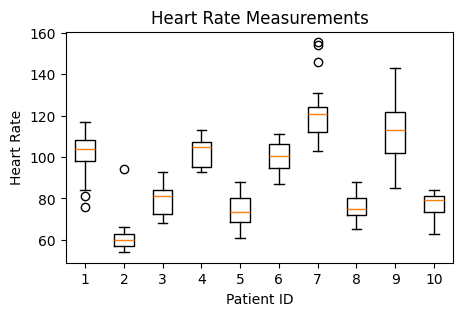

In [11]:
# Plot the data
plt.figure(figsize=(5, 3))
plt.boxplot(list_of_heart_rate_lists)
plt.xlabel('Patient ID')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Measurements')
plt.show()

The default tick marks along the bottom are the numbers 1...N, where N is the number of distributions we want to show. We can give these tick marks more meaningful names as follows:

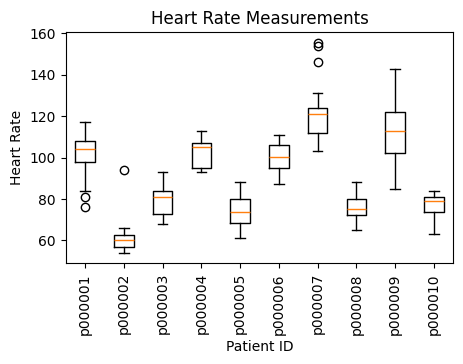

In [12]:
# Generate a numeric sequence corresponding to the original tick marks
old_ticks = np.arange(len(patient_ids))+1 #+1 becuase sequence starts at 1 instead of 0

# Plot the data
plt.figure(figsize=(5, 3))
plt.boxplot(list_of_heart_rate_lists)
plt.xlabel('Patient ID')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Measurements')
plt.xticks(ticks=old_ticks, labels=patient_ids, rotation=90) # the real line weve added
plt.show()

# Line Graph

Finally, let's imagine that we wanted to create a ***line graph*** showing the changes in a patient's heart rate over time. To make this graph, we will want to get two sets of data:
1. The independent variable, which is the timestamp of each measurement
2. The dependent variable, which is the heart rate measurement at each timestamp.


In [13]:
# Get the timestamps and measurements of the first patient's heart rate data
p1_data = df[df['PatientID'] == 'p000001'] #row selector for patient 1 p000001
p1_hr = p1_data['HR'] # care about two vlaues HR collum
p1_hour = p1_data['Hour'] #and hour collumn

We can call the `plot()` function to generate a line graph of this data. Similar to what we was required for the `bar()` function, we need to at least specify the independent and dependent values in that order.

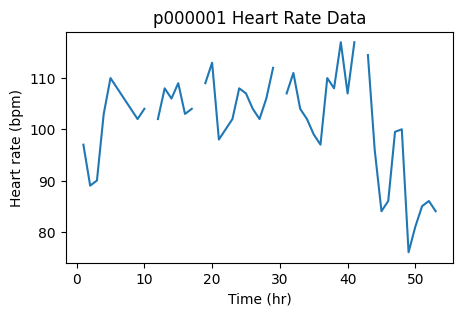

In [14]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr)
plt.title('p000001 Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.show()
#where there were no measurements the is no value

Notice that this graph has gaps. This is because the heart rate value at that time was `np.nan`, and `matplotlib` ignores these values when generating plots.

Now let's say that we wanted to overlay the heart rate data from another patient on top of the graph. Let's start by grabbing that data.

In [17]:
# Get the second patient's data ## could just do each one by itself again and again
p2_data = df[df['PatientID'] == 'p000002']
p2_hr = p2_data['HR']
p2_hour = p2_data['Hour']

And now let's add that data to our graph. We can do that by calling `plot()` a second time without generating a new figure with `plt.figure()`.

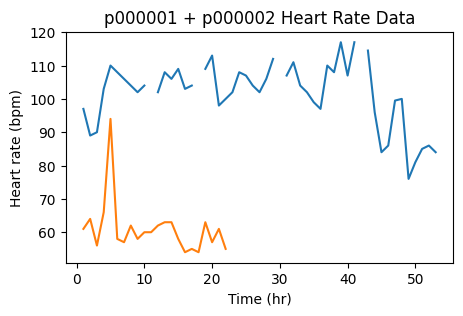

In [18]:
#all code is the same except two lines: plot the new data, then change title
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr)
plt.plot(p2_hour, p2_hr) # Plot the new data
plt.title('p000001 + p000002 Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.show() ##legend would be ver helpful here

So now we have two lines, and `matplotlib` automatically drew the new line with a different color. But how are other people going to know which line belongs to which patient? Let's add an informative legend.

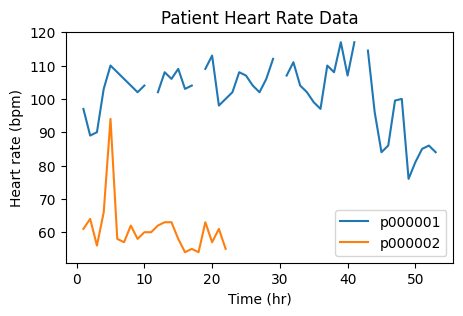

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr, label='p000001') # Add a label to the first patient's data
plt.plot(p2_hour, p2_hr, label='p000002') # Add a label to the second patient's data
plt.title('Patient Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.legend() # Generate the legend
plt.show()

# Aesthetics

With all of the graphs we generated, there are hundreds of parameters we can leverage to tweak the appearance of the graph. `matplotlib` can change, among other visual attributes:
* Line color
* Line style (e.g., solid, dashed)
* Line thickness
* Points or no points
* Size of points

We don't have time to go over all of these features, but here is a quick example to show what is possible.

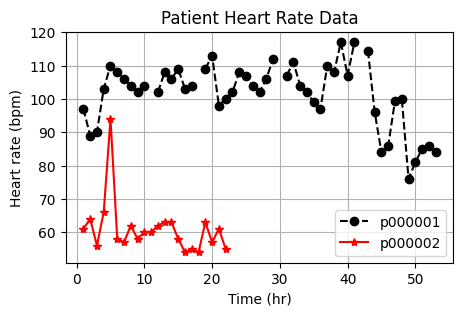

In [20]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr, 'k--o', label='p000001') # k = black, -- = dashed line, o = circles for points
plt.plot(p2_hour, p2_hr, 'r-*', label='p000002') # r = red, - = solid line, * = stars for points
plt.grid() # Add grid lines that match the tick marks along the axes
plt.title('Patient Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.legend()
plt.show()

# Subplots

You might find it helpful to put multiple plots side-by-side. In these situations, you can use the function `plt.subplot()`, which helps you arrange your plots in a grid. This function takes three arguments: (1) the number of rows you want to set up in your grid, (2) the number of columns you want to set up in your grid, and (3) the position ID of the current graph that you want to plot. For example, this code cell generates a 2 $\times$ 3 grid of empty plots:

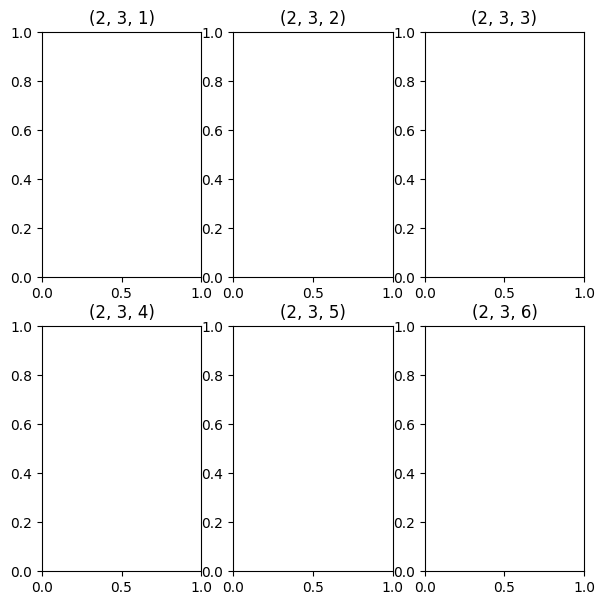

In [21]:
plt.figure(figsize=(7, 7))
plt.subplot(2, 3, 1) #2 rows, three collums, named them 1-6, subplot is its own little figure
plt.title('(2, 3, 1)')

plt.subplot(2, 3, 2)
plt.title('(2, 3, 2)')

plt.subplot(2, 3, 3)
plt.title('(2, 3, 3)')

plt.subplot(2, 3, 4)
plt.title('(2, 3, 4)')

plt.subplot(2, 3, 5)
plt.title('(2, 3, 5)')

plt.subplot(2, 3, 6)
plt.title('(2, 3, 6)')
plt.show()

You can basically think of these `plt.subplot()` calls as mini-`plt.figure()` calls. Once you create a new subplot, all of the new plots generated thereafer are added to that part of your overall figure.

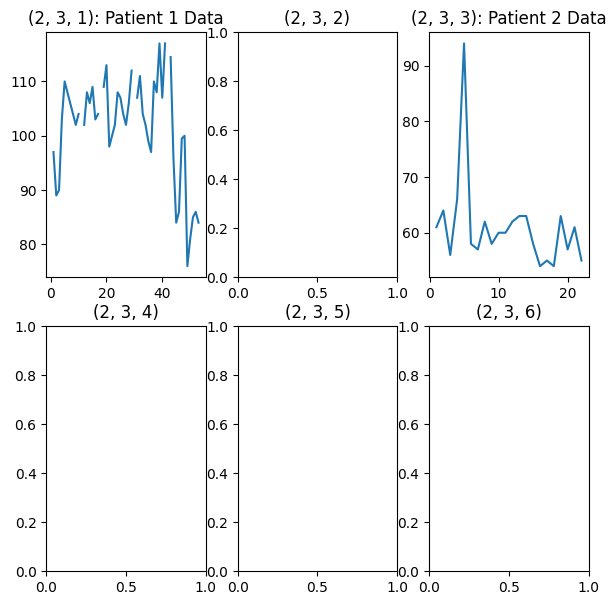

In [22]:
plt.figure(figsize=(7, 7))
plt.subplot(2, 3, 1)
plt.plot(p1_hour, p1_hr)
plt.title('(2, 3, 1): Patient 1 Data')
plt.subplot(2, 3, 2)
plt.title('(2, 3, 2)')
plt.subplot(2, 3, 3)
plt.plot(p2_hour, p2_hr)
plt.title('(2, 3, 3): Patient 2 Data')
plt.subplot(2, 3, 4)
plt.title('(2, 3, 4)')
plt.subplot(2, 3, 5)
plt.title('(2, 3, 5)')
plt.subplot(2, 3, 6)
plt.title('(2, 3, 6)')
plt.show()

You can actually get quite creative with subplots by mixing your grid specifications. In this example here, we split up the top row into two plots, but we pretend that the bottom row only has one spot so that the plot fills in both columns:

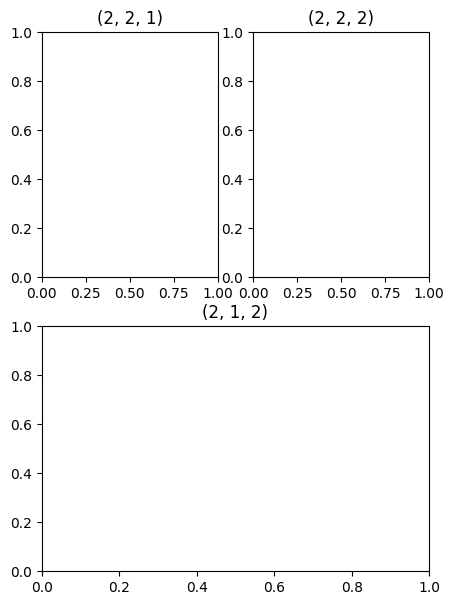

In [23]:
plt.figure(figsize=(5, 7))
plt.subplot(2, 2, 1)
plt.title('(2, 2, 1)')
plt.subplot(2, 2, 2)
plt.title('(2, 2, 2)')
plt.subplot(2, 1, 2)
plt.title('(2, 1, 2)')
plt.show()